# Car Price Prediction - Multiple Linear Regression

In this notebook, I'll work with the Kaggle dataset about used cars and their prices. The notebook first includes exploration of the dataset followed by prediction of prices.


**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

I'll read the dataset and get information about it.

In [2]:
#Reading the data and checking it
data=pd.read_csv('C:/Users/nanth/OneDrive/Desktop/CarPrice.csv')
data


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**Exploratory Data Analysis**


Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

In [3]:
#Checking first few rows
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#describe the dataset
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**correlation coefficient**

In [7]:
cor = data.corr()
cor["price"]

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

<AxesSubplot:>

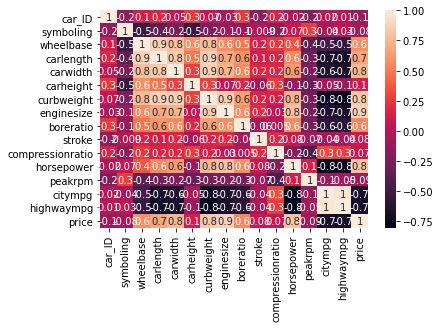

In [8]:
# Correlation Matrix
sns.heatmap(data.corr(), annot = True, fmt='.1g')

In [19]:
data.drop(['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)
x = data.iloc[:, :-1].values #independent variables
y = data.iloc[:, -1].values #dependent variable, price.


In [20]:
x

array([['gas', 'std', 'two', ..., 5000, 21, 27],
       ['gas', 'std', 'two', ..., 5000, 21, 27],
       ['gas', 'std', 'two', ..., 5000, 19, 26],
       ...,
       ['gas', 'std', 'four', ..., 5500, 18, 23],
       ['diesel', 'turbo', 'four', ..., 4800, 26, 27],
       ['gas', 'turbo', 'four', ..., 5400, 19, 25]], dtype=object)

In [21]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

**Take Care of Missing Data**

In [22]:
data.notnull().all()


fueltype            True
aspiration          True
doornumber          True
carbody             True
drivewheel          True
enginelocation      True
wheelbase           True
carlength           True
carwidth            True
carheight           True
curbweight          True
enginetype          True
cylindernumber      True
enginesize          True
fuelsystem          True
boreratio           True
stroke              True
compressionratio    True
horsepower          True
peakrpm             True
citympg             True
highwaympg          True
price               True
dtype: bool

**Encoding Categorical Data**

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer( transformers= [('encoder', OneHotEncoder(), [0, 1 ,2 ,3 ,4, 5, 11, 12, 14])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [25]:
x

array([[0.0, 1.0, 1.0, ..., 5000, 21, 27],
       [0.0, 1.0, 1.0, ..., 5000, 21, 27],
       [0.0, 1.0, 1.0, ..., 5000, 19, 26],
       ...,
       [0.0, 1.0, 1.0, ..., 5500, 18, 23],
       [1.0, 0.0, 0.0, ..., 4800, 26, 27],
       [0.0, 1.0, 0.0, ..., 5400, 19, 25]], dtype=object)

**Split the Dataset into Training Set and Test Set**

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

**Training the Multiple Linear Regression Model on the Training Set**


In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

**Predicting the Test Set Results**

In [28]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2) 

In [29]:
y_pred

array([27718.79, 21325.01, 20819.73,  8184.65,  7003.57, 17339.42,
        5675.36,  5623.87,  6081.03,  7951.95, 32960.04, 32930.77,
        6127.19,   535.38,  4521.82,  9109.07, 20616.89, 12426.59,
        7564.2 , 12216.37, 13388.91,  8919.53,  7469.67, 16105.95,
       16958.84,  9406.61,  8281.3 ,  7276.78,  5859.52, 17102.27,
        5779.53,  6117.81, 12186.85,  4004.  , 38117.87, 26004.26,
       11690.14, 10828.86, 17470.76, 13098.27,  9180.33])

**Calculate the Accuracy**


In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.845465652309721

As a result, the accuracy is %85